## In Vitro Validation with NanoBert

### Load data

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Define function

In [2]:
def sigmoidal_curve(x, a, b, c):
    y = c / (1 + np.exp(-a*(x-b)))
    return y

### Analyze BRAF

In [3]:
raw_data_braf = pd.read_excel('nanobert/NanoBREAT_202303_BRAF.xlsx', sheet_name=0)

x = np.array(raw_data_braf.iloc[3:,1]).astype(float)

y_belv = np.array(raw_data_braf.iloc[3:, 2:5]).astype(float)
y_belv /= np.array(raw_data_braf.iloc[2, 2:5]).astype(float)
y_belv_mean = np.mean(y_belv, axis = 1)
y_belv_sd = np.std(y_belv, axis = 1)

y_bafe = np.array(raw_data_braf.iloc[3:, 6:9]).astype(float)
y_bafe /= np.array(raw_data_braf.iloc[2, 6:9]).astype(float)
y_bafe_mean = np.mean(y_bafe, axis = 1)
y_bafe_sd = np.std(y_bafe, axis = 1)

y_abem = np.array(raw_data_braf.iloc[3:, 10:13]).astype(float)
y_abem /= np.array(raw_data_braf.iloc[2, 10:13]).astype(float)
y_abem_mean = np.mean(y_abem, axis = 1)
y_abem_sd = np.std(y_abem, axis = 1)

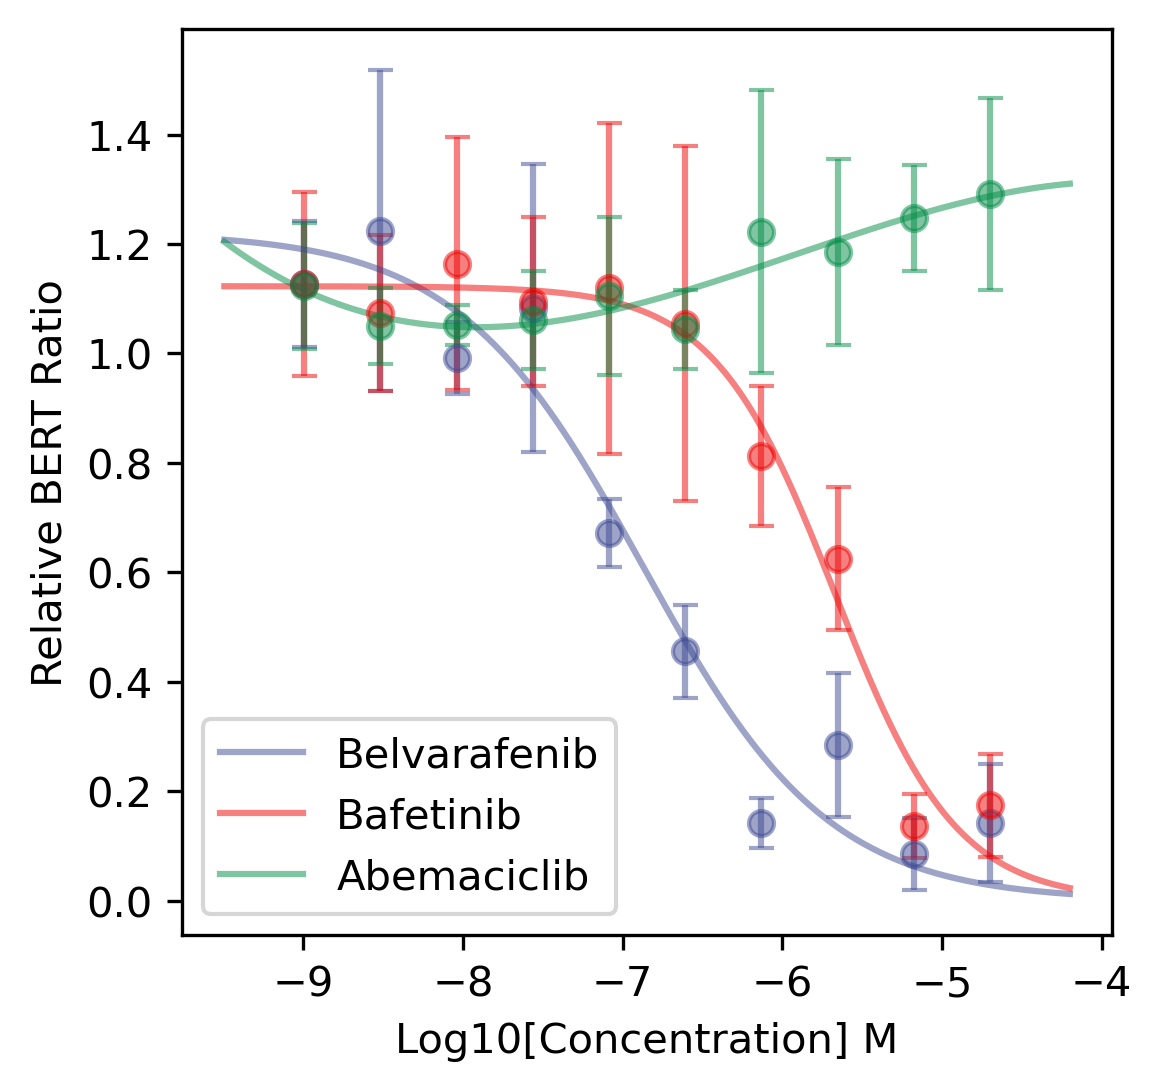

In [4]:
x0 = np.arange(np.min(x) - 0.5, np.max(x) + 0.5, 0.001)
popt1, pcov1 = curve_fit(sigmoidal_curve, list(x) , list(y_belv_mean), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x), list(y_bafe_mean), maxfev=10000)
popt3 = np.poly1d(np.polyfit(x, y_abem_mean, 3))

plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Belvarafenib', color='#3B49927F')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='Bafetinib', color='#EE00007F')
plt.plot(x0, popt3(x0), label='Abemaciclib', color='#008B457F')
plt.errorbar(x, y_belv_mean, yerr=y_belv_sd, fmt='o', capsize=3, color='#3B49927F')
plt.errorbar(x, y_bafe_mean, yerr=y_bafe_sd, fmt='o', capsize=3, color='#EE00007F')
plt.errorbar(x, y_abem_mean, yerr=y_abem_sd, fmt='o', capsize=3, color='#008B457F')
plt.legend()
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative BERT Ratio")
plt.show()

In [5]:
# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9

# Print the IC50 value
print("Belvarafenib IC50 = {:.2f} nM".format(ic50_1))
print("Bafetinib IC50 = {:.2f} nM".format(ic50_2))

Belvarafenib IC50 = 134.68 nM
Bafetinib IC50 = 2138.71 nM


### Analyze BRAF V600E

In [6]:
raw_data_braf = pd.read_excel('nanobert/NanoBREAT_202303_BRAF.xlsx', sheet_name=1)

x = np.array(raw_data_braf.iloc[3:,1]).astype(float)

y_belv = np.array(raw_data_braf.iloc[3:, 11:14]).astype(float)
y_belv /= np.array(raw_data_braf.iloc[2, 11:14]).astype(float)
y_belv_mean = np.mean(y_belv, axis = 1)
y_belv_sd = np.std(y_belv, axis = 1)

y_bafe = np.array(raw_data_braf.iloc[3:, 2:5]).astype(float)
y_bafe /= np.array(raw_data_braf.iloc[2, 2:5]).astype(float)
y_bafe_mean = np.mean(y_bafe, axis = 1)
y_bafe_sd = np.std(y_bafe, axis = 1)

y_abem = np.array(raw_data_braf.iloc[3:, 6:9]).astype(float)
y_abem /= np.array(raw_data_braf.iloc[2, 6:9]).astype(float)
y_abem_mean = np.mean(y_abem, axis = 1)
y_abem_sd = np.std(y_abem, axis = 1)

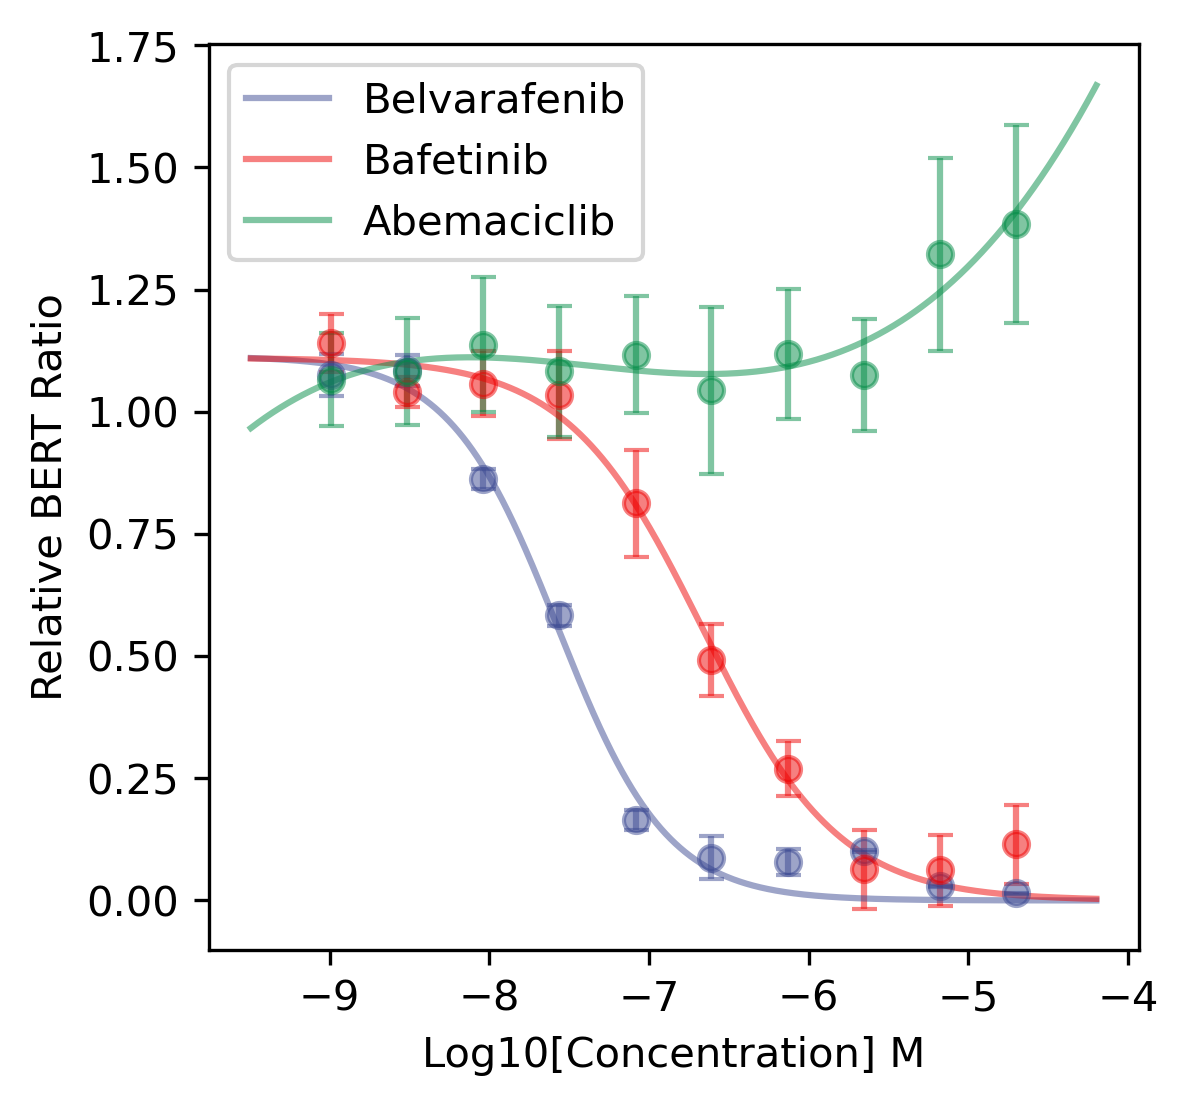

In [7]:
x0 = np.arange(np.min(x) - 0.5, np.max(x) + 0.5, 0.001)
popt1, pcov1 = curve_fit(sigmoidal_curve, list(x) , list(y_belv_mean), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x), list(y_bafe_mean), maxfev=10000)
popt3 = np.poly1d(np.polyfit(x, y_abem_mean, 3))

plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Belvarafenib', color='#3B49927F')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='Bafetinib', color='#EE00007F')
plt.plot(x0, popt3(x0), label='Abemaciclib', color='#008B457F')
plt.errorbar(x, y_belv_mean, yerr=y_belv_sd, fmt='o', capsize=3, color='#3B49927F')
plt.errorbar(x, y_bafe_mean, yerr=y_bafe_sd, fmt='o', capsize=3, color='#EE00007F')
plt.errorbar(x, y_abem_mean, yerr=y_abem_sd, fmt='o', capsize=3, color='#008B457F')
plt.legend()
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative BERT Ratio")
plt.show()

In [8]:
# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9

# Print the IC50 value
print("Belvarafenib IC50 = {:.2f} nM".format(ic50_1))
print("Bafetinib IC50 = {:.2f} nM".format(ic50_2))

Belvarafenib IC50 = 26.96 nM
Bafetinib IC50 = 217.52 nM


### Analyze CSNK2A2

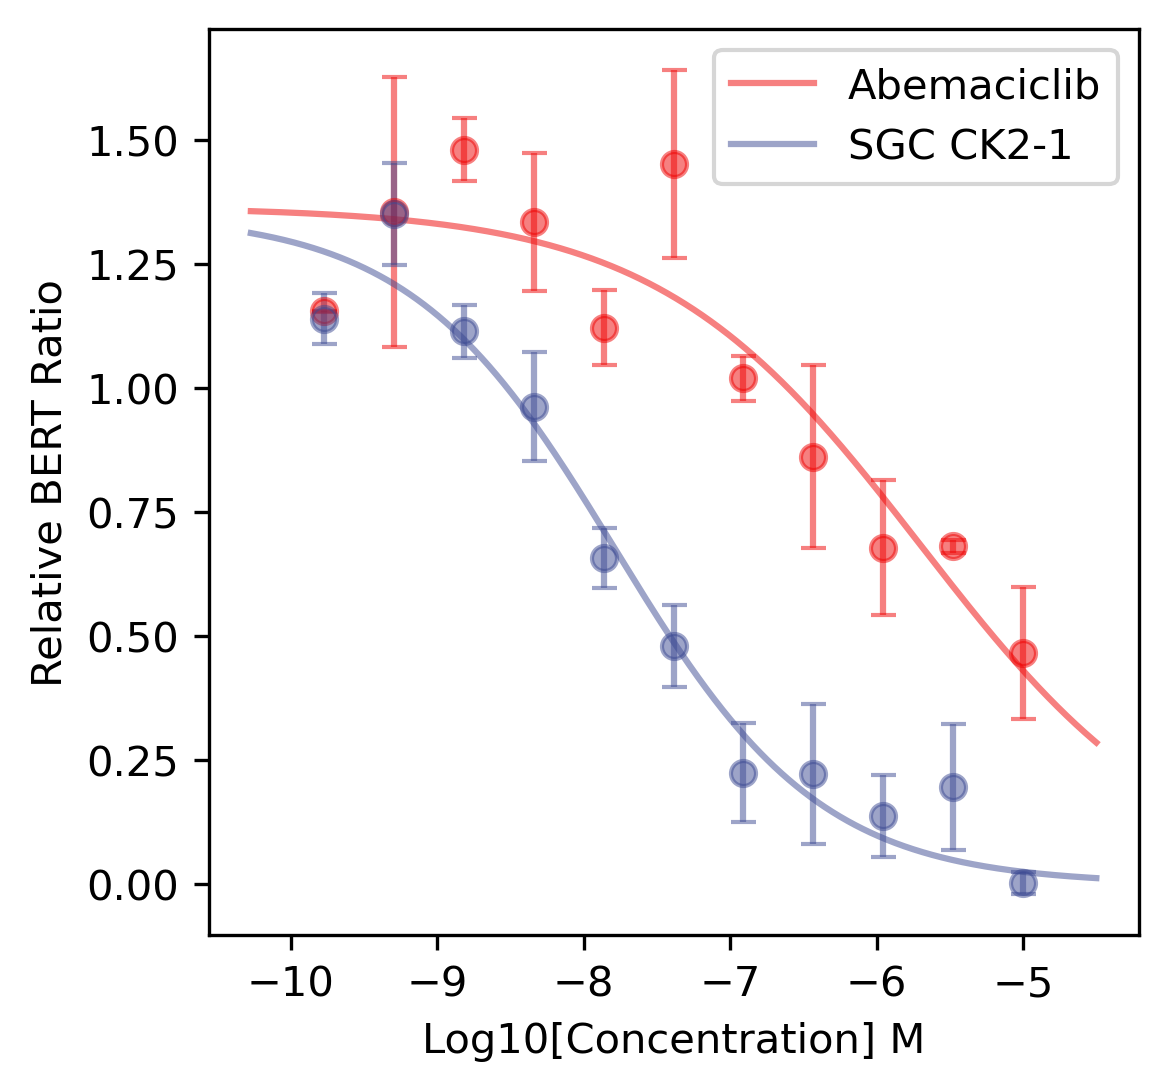

In [9]:
raw_data_ck2 = pd.read_excel('nanobert/NanoBREAT_202301_CK2_UK.xlsx', sheet_name=0)

x = np.array(raw_data_ck2.iloc[1:,0]).astype(float)

y_abem_mean = np.array(raw_data_ck2.iloc[1:,1]).astype(float)
y_abem_sd = np.array(raw_data_ck2.iloc[1:,2]).astype(float)

y_sgc_mean = np.array(raw_data_ck2.iloc[1:,3]).astype(float)
y_sgc_sd = np.array(raw_data_ck2.iloc[1:,4]).astype(float)

x0 = np.arange(np.min(x) - 0.5, np.max(x) + 0.5, 0.001)
popt1, pcov1 = curve_fit(sigmoidal_curve, list(x) , list(y_abem_mean), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x), list(y_sgc_mean), maxfev=10000)

plt.figure(figsize=(4, 4), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Abemaciclib', color='#EE00007F')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='SGC CK2-1', color='#3B49927F')

plt.errorbar(x, y_abem_mean, yerr=y_abem_sd, fmt='o', capsize=3, color='#EE00007F')
plt.errorbar(x, y_sgc_mean, yerr=y_sgc_sd, fmt='o', capsize=3, color='#3B49927F')

plt.legend()
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative BERT Ratio")
plt.show()

In [10]:
# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9

# Print the IC50 value
print("Abemaciclib IC50 = {:.2f} nM".format(ic50_1))
print("SGC CK2-1 IC50 = {:.2f} nM".format(ic50_2))

Abemaciclib IC50 = 2010.68 nM
SGC CK2-1 IC50 = 16.44 nM
